# Preprocessing: Extract Images from Video

I will first extract the images from video using OpenCV

* VideoCapture(File_path): read the video in the mp4 format
* read(): read data depending on type of object that calls
* imwrite(filename, img[, params]): saves an image to a specified file

In [ ]:
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/contents')

Drive already mounted at /contents; to attempt to forcibly remount, call drive.mount("/contents", force_remount=True).


In [ ]:
cam = cv2.VideoCapture('/contents/MyDrive/VIDEOS/train.mp4') #this 'train.mp4' contains all of the 40 training set videos merged into one

try:
      
    # creating a folder named data
    if not os.path.exists('train'):
        os.makedirs('train')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

  
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './train/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../train/frame0.jpg
Creating..../train/frame1.jpg
Creating..../train/frame2.jpg
Creating..../train/frame3.jpg
Creating..../train/frame4.jpg
Creating..../train/frame5.jpg
Creating..../train/frame6.jpg
Creating..../train/frame7.jpg
Creating..../train/frame8.jpg
Creating..../train/frame9.jpg
Creating..../train/frame10.jpg
Creating..../train/frame11.jpg
Creating..../train/frame12.jpg
Creating..../train/frame13.jpg
Creating..../train/frame14.jpg
Creating..../train/frame15.jpg
Creating..../train/frame16.jpg
Creating..../train/frame17.jpg
Creating..../train/frame18.jpg
Creating..../train/frame19.jpg
Creating..../train/frame20.jpg
Creating..../train/frame21.jpg
Creating..../train/frame22.jpg
Creating..../train/frame23.jpg
Creating..../train/frame24.jpg
Creating..../train/frame25.jpg
Creating..../train/frame26.jpg
Creating..../train/frame27.jpg
Creating..../train/frame28.jpg
Creating..../train/frame29.jpg
Creating..../train/frame30.jpg
Creating..../train/frame31.jpg
Creating..../train

We do the same for the testing data

In [ ]:
cam = cv2.VideoCapture('/contents/MyDrive/VIDEOS/test.mp4') #this 'train.mp4' contains all of the 40 training set videos merged into one

try:
      
    # creating a folder named data
    if not os.path.exists('test'):
        os.makedirs('test')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

  
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './test/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../test/frame0.jpg
Creating..../test/frame1.jpg
Creating..../test/frame2.jpg
Creating..../test/frame3.jpg
Creating..../test/frame4.jpg
Creating..../test/frame5.jpg
Creating..../test/frame6.jpg
Creating..../test/frame7.jpg
Creating..../test/frame8.jpg
Creating..../test/frame9.jpg
Creating..../test/frame10.jpg
Creating..../test/frame11.jpg
Creating..../test/frame12.jpg
Creating..../test/frame13.jpg
Creating..../test/frame14.jpg
Creating..../test/frame15.jpg
Creating..../test/frame16.jpg
Creating..../test/frame17.jpg
Creating..../test/frame18.jpg
Creating..../test/frame19.jpg
Creating..../test/frame20.jpg
Creating..../test/frame21.jpg
Creating..../test/frame22.jpg
Creating..../test/frame23.jpg
Creating..../test/frame24.jpg
Creating..../test/frame25.jpg
Creating..../test/frame26.jpg
Creating..../test/frame27.jpg
Creating..../test/frame28.jpg
Creating..../test/frame29.jpg
Creating..../test/frame30.jpg
Creating..../test/frame31.jpg
Creating..../test/frame32.jpg
Creating..../test/fr

Now having merged the videos and converted all the frames into individual images, we can perform some proprocessing to the data. In this case we have a total of 656 training examples and 128 testing examples. 

In [ ]:
train_count = 0
for root_dir, cur_dir, files in os.walk(r'/content/train'):
    train_count += len(files)
print('file count:', train_count)

file count: 656


In [ ]:
test_count = 0
for root_dir, cur_dir, files in os.walk(r'/content/test'):
    test_count += len(files)
print('file count:', test_count)

file count: 128


In [ ]:
from PIL import Image
import numpy as np

train_filelist = ['/content/train/frame' + str(i) + '.jpg' for i in range(train_count)]
test_filelist = ['/content/test/frame' + str(i) + '.jpg' for i in range(test_count)]
X_train_RGB = np.array([np.array(Image.open(fname)) for fname in train_filelist])
X_test_RGB = np.array([np.array(Image.open(fname)) for fname in test_filelist])


In [ ]:
X_train_RGB.shape, X_test_RGB.shape

((656, 128, 128, 3), (128, 128, 128, 3))

This data set contains 656 training examples and 128 testing examples, with example of the shape (128,128,3)

# Task 1a): reduce data dimensions using PCA

First, we import the relevant libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg


First, for illustration purposes, I will display a single random frame.

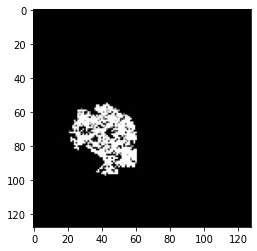

In [ ]:
img = cv2.cvtColor(cv2.imread('train/frame158.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

I will then check the shape.

In [ ]:
img.shape

(128, 128, 3)

Now, splitting the image into three channeles and then display.

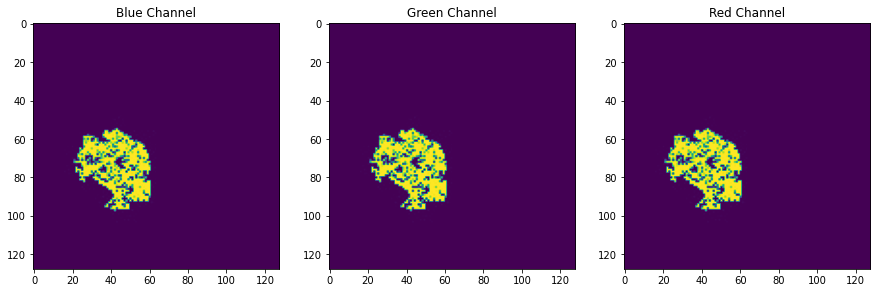

In [ ]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

To verify the data of the blue channel, I will run the following line, although the image only contains binary pixel values and it does not matter which channel I select.

In [ ]:
red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is apparent that the data is indeed 128 dimensions

Before I perform PCA, it is important that I first perform feature scaling so that data is scaled between 0 and 1.

In [ ]:
df_blue = blue/255
df_green = green/255
df_red = red/255

Now, to fit and transform the data using Principal Dimensional Analysis (PCA), I will reduce the original data in 128 dimensions to 10 dimensions and check how much variance is explained after reducing the data to 10 dimensions.

In [ ]:
pca_b = PCA(n_components=10)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=10)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=10)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

Now, I will check the shape of the transformed image in each channel

In [ ]:
shape = trans_pca_b.shape, trans_pca_r.shape, trans_pca_g.shape
print('the shape of the transformed data is of the shape ' + str(shape))

the shape of the transformed data is of the shape ((128, 10), (128, 10), (128, 10))


This is indeed expected. Now I will check the sum of the explained variance ratios of the 10 PCA components, that is the largest 10 eigenvalues for each channel.

In [ ]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9005553455279294
Green Channel: 0.9005553455279294
Red Channel  : 0.9005553455279294


It is quite extraodinary that when using only 10 components, over 90% of the variance is retained. Now, I will use a plot bar to verify the explained variance ratio by each Eigenvalues separately for each of the three channels

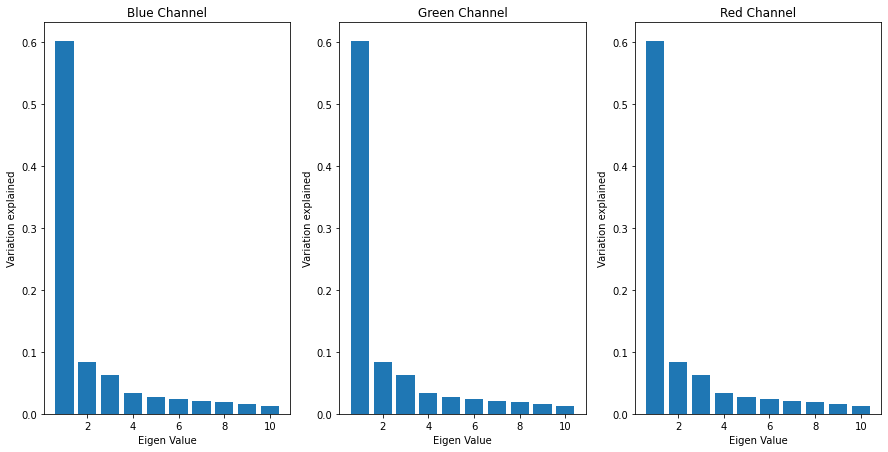

In [ ]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,11)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,11)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,11)),pca_r.explained_variance_ratio_)
plt.show()

To visualize the image again, I will perform reverse transformation and then merge the data from three channels into one

In [ ]:
blue = pca_b.inverse_transform(trans_pca_b)
green = pca_g.inverse_transform(trans_pca_g)
red = pca_r.inverse_transform(trans_pca_r)

print(blue.shape, green.shape, red.shape)

(128, 128) (128, 128) (128, 128)


Merging all the channels into one and printing the final shape

In [ ]:
reduced_image = (cv2.merge((blue, green, red)))
print(reduced_image.shape)

(128, 128, 3)


Plotting both images would demonstrate the effect of dimensionality reduction

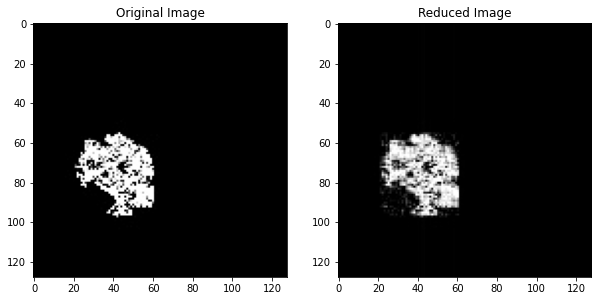

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(reduced_image)
plt.show()

Now, to perform PCA on all the images in the dataset, I will return to the dataset X which has all the training examples stored in the tensor with the shape (656, 128, 128, 3), denoting 656 training examples each with the shape (128, 128, 3). 

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import PCA

# since all images are contain only binary pixel values, I will only select a single channel and rename as my data set
X_train = X_train_RGB[:,:,:,1] 
X_test = X_test_RGB[:,:,:,1]
X_train_PCAtransformed = np.zeros((X_train.shape[0], X_train.shape[1],10))
X_test_PCAtransformed = np.zeros((X_test.shape[0], X_test.shape[1],10))
  
X_train[1].shape, X_test[1].shape


((128, 128), (128, 128))

In [ ]:
for i in range(X_train.shape[0]):
    pca = PCA(n_components = 10)
    x = X_train[i]
    x = sklearn.preprocessing.normalize(x) #this would normalize the data using default l2 normalization
    pca.fit(x)
    X_train_PCAtransformed[i] = pca.transform(x)

for i in range(X_test.shape[0]):
    pca = PCA(n_components = 10)
    x = X_test[i]
    x = sklearn.preprocessing.normalize(x) #this would normalize the data using default l2 normalization
    pca.fit(x)
    X_test_PCAtransformed[i] = pca.transform(x)

print('the transformed dataset has dimensions', (X_train_PCAtransformed.shape, X_test_PCAtransformed.shape))


the transformed dataset has dimensions ((656, 128, 10), (128, 128, 10))


Now the dimension-reduced, feature-extracted dataset is stored in the numpy array `X_train_PCAtransformed`.

# Task 1b): Performing the same task using the convolutional autoencoder
For this task I will use Tensorflow and perform feature extraction via dimensionality reduction using autoencoder.

First, I will build the encoder using the functional API. The layers of the model will be created using the `tensorflow.keras.layers` API.

The first layer is an `input` layer which accepts the original image. It also accepts an argument named shape which represents the size of the input, depending on the dataset being used. 

Here, since the size of each image is `128 x 128`, i will set it to `(16384)` as the input only accepts vectors as input. The tensor representing the input layer is returned to the variable x

The input layer is then propagated through a number of layers:
* 2 `Dense` layer with 300 neurons
* 2 `LeakyReLU` layer -> LeakyReLU as the activation function
* `Dense` layer with 2 neurons
* `LeakyRelU` layer

The last `Dense` layer only has 2 neurons. When fed into the `LeakyReLU` layer, the final output of the encoder will be a 1-D vector with just two elements.

Hence, all images in my original dataset will be encoded as vectors of two elements

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape = (16384), name = 'encoder_input')

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=500, name = 'encoder_dense_1')(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=500, name="encoder_dense_2")(encoder_activ_layer1)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(encoder_dense_layer2)

encoder_dense_layer3 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_3")(encoder_activ_layer2)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer3)

Next, I will build the model using `tensorflow.keras.models` API by specifying the input & output tensors according to the next line

In [ ]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

Now I will print a encoder architecture summary. I could potentially increase the number of neurons in the dense layer in `encoder_dense_1` but 300 neurons will be fast to train

In [ ]:
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 16384)]           0         
                                                                 
 encoder_dense_1 (Dense)     (None, 500)               8192500   
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 500)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 500)               250500    
                                                                 
 encoder_leakyrelu_2 (LeakyR  (None, 500)              0         
 eLU)                                                            
                                                                 
 encoder_dense_3 (Dense)     (None, 2)               

Next, I will work on the decoder. The architecture is similar. However, since the input layer of the decoder accepts the output returned from the last layer of the encoder, I should make sure the two layers are matched in size. The last layer in the encoder returns a vector of 2 elements, therefore the input of the decoder must have two neurons.

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=500, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=500, name="decoder_dense_2")(decoder_activ_layer1)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_dense_layer2)

decoder_dense_layer3 = tensorflow.keras.layers.Dense(units=16384, name="decoder_dense_3")(decoder_activ_layer2)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer3)

Again, I will build the decoder model.

In [ ]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name = 'decoder_model')

In [ ]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 decoder_dense_1 (Dense)     (None, 500)               1500      
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 500)              0         
 eLU)                                                            
                                                                 
 decoder_dense_2 (Dense)     (None, 500)               250500    
                                                                 
 decoder_leakyrelu_2 (LeakyR  (None, 500)              0         
 eLU)                                                            
                                                                 
 decoder_dense_3 (Dense)     (None, 16384)           

Now, I will build the autoencoder. The tensor `ae_input` represents input layer that accepts vector of length `16384`. The tensor is fed to the encoder model as an input. The output from the encoder is saved in `ae_encoder_output` which is then fed to the decoder. Eventually the output from the autoencoder is saved in `ae_decoder_output`. 

In [ ]:
ae_input = tensorflow.keras.layers.Input(shape = (16384), name = 'AE_input')
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name = 'AE')

In [ ]:
ae.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 16384)]           0         
                                                                 
 encoder_model (Functional)  (None, 2)                 8444002   
                                                                 
 decoder_model (Functional)  (None, 16384)             8460384   
                                                                 
Total params: 16,904,386
Trainable params: 16,904,386
Non-trainable params: 0
_________________________________________________________________


Here, I would use MSE as the loss function.

In [ ]:
import tensorflow.keras.optimizers
ae.compile(loss = 'mse', optimizer = tensorflow.keras.optimizers.Adam(lr = 0.0005))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Now the model can accept the training data.

In [ ]:
import numpy as np
X_train = X_train_RGB[:,:,:,1]
X_test = X_test_RGB[:,:,:,1]

# first I will normalize the trainind and testing data like before
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# then I will reshape the training and testing data so that the matrices become 2-dimensions, each column match the number of elements in the input layer of the neural network
X_train_reshaped = np.reshape(X_train_normalized, newshape = (X_train_normalized.shape[0], np.prod(X_train_normalized.shape[1:])))
X_test_reshaped = np.reshape(X_test_normalized, newshape = (X_test_normalized.shape[0], np.prod(X_test_normalized.shape[1:])))

X_train.shape, X_test.shape, X_train_reshaped.shape, X_test_reshaped.shape

((656, 128, 128), (128, 128, 128), (656, 16384), (128, 16384))

It is clear that that now both the training dataset and the testing dataset has been reshaped to dimensions (656, 16384) and (128, 16384), where 16384 represents the number of elements in a row vector for each training example.

ie
\begin{align} 
X_{train} &= \begin{bmatrix} \mathbf{x^{(1)}}^T \\ \mathbf{x^{(2)}}^T \\ ... \\ \mathbf{x^{(656)}}^T
\end{bmatrix}
\\
X_{test} &= \begin{bmatrix} \mathbf{x^{(1)}}^T \\ \mathbf{x^{(2)}}^T \\ ... \\ \mathbf{x^{(128)}}^T
\end{bmatrix}
\end{align}

And

\begin{align}
\mathbf{x}^{(i)} \in \mathbb{R}^{16384 \times 1}
\end{align}




Now, I will be making predictions using the `predict()` method. The `encoded-images` numpy array holds the 1D vectors representing all the training images, and the decoder model accepts the array to recontruct the original images.

We can now train the autoencoder using the `fit` method

In [ ]:
model_history = ae.fit(X_train_reshaped, X_train_reshaped, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test_reshaped, X_test_reshaped))

Epoch 1/20
3/3 [==============================] - 4s 825ms/step - loss: 0.0184 - val_loss: 0.0114
Epoch 2/20
3/3 [==============================] - 2s 745ms/step - loss: 0.0182 - val_loss: 0.0109
Epoch 3/20
3/3 [==============================] - 2s 535ms/step - loss: 0.0172 - val_loss: 0.0095
Epoch 4/20
3/3 [==============================] - 2s 540ms/step - loss: 0.0152 - val_loss: 0.0080
Epoch 5/20
3/3 [==============================] - 2s 533ms/step - loss: 0.0137 - val_loss: 0.0075
Epoch 6/20
3/3 [==============================] - 2s 504ms/step - loss: 0.0134 - val_loss: 0.0074
Epoch 7/20
3/3 [==============================] - 2s 532ms/step - loss: 0.0133 - val_loss: 0.0073
Epoch 8/20
3/3 [==============================] - 2s 509ms/step - loss: 0.0132 - val_loss: 0.0072
Epoch 9/20
3/3 [==============================] - 2s 516ms/step - loss: 0.0130 - val_loss: 0.0071
Epoch 10/20
3/3 [==============================] - 2s 530ms/step - loss: 0.0124 - val_loss: 0.0069
Epoch 11/20
3/3 [==

In [ ]:
encoded_images = encoder.predict(X_train_reshaped)
decoded_images = decoder.predict(encoded_images)

21/21 [==============================] - 0s 20ms/step


Note that the output of the decoder is a 1D vector of length `16384`. To display the reconstructed images, the decoder output is reshaped to `128 x 128`.

In [ ]:
decoded_images_orig = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 128, 128))

In [ ]:
decoded_images_orig.shape

(656, 128, 128)

Next, I will display the original image and dimensionality reduced image from 4 random samples. 

In [ ]:
import matplotlib.pyplot as plt

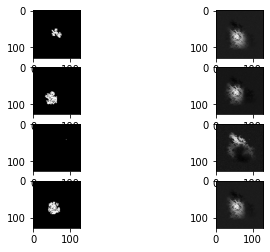

In [ ]:
num_images_to_show = 4
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=X_train_reshaped.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(X_train[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

To check that the data has converged, I will plot the loss against the Epoch.

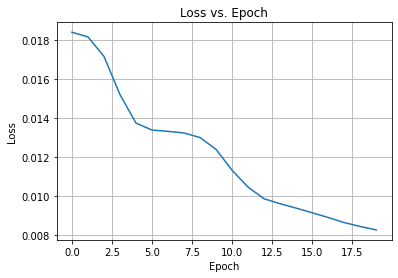

In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

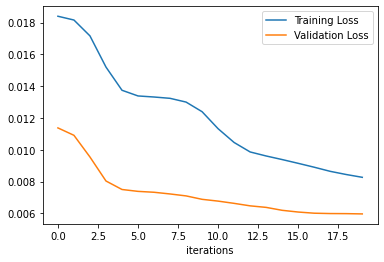

In [ ]:
plt.plot(model_history.history["loss"], label="Training Loss")
plt.plot(model_history.history["val_loss"], label="Validation Loss")
plt.xlabel('iterations')
plt.legend()

Projecting the multi-dimensional data onto a 2D plane produces the following graph.

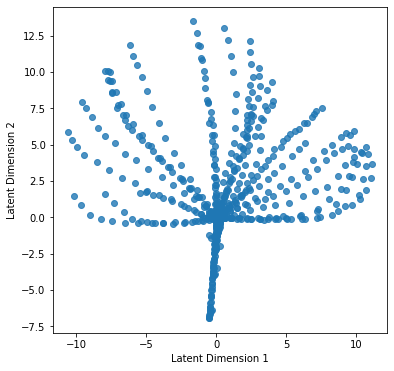

In [ ]:
encoded_X_train = encoder(X_train_reshaped)
plt.figure(figsize=(6,6))
plt.scatter(encoded_X_train[:, 0], encoded_X_train[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

I will lastly compare the latent space representation for the autoencoder and the principal components derived from PCA decomposition to contrast how accurate each algorithm represents the data while reducing the dimensions.

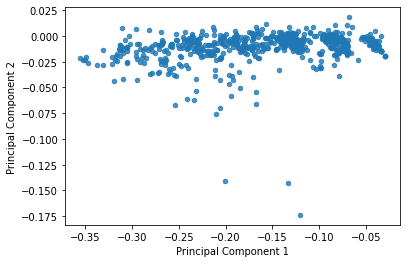

In [ ]:
# I will first reshape the PCA transformed training data into the dimensions (656,1280) to plot the graph
X_train_PCAtransformed_reshaped = np.reshape(X_train_PCAtransformed, newshape = (X_train_PCAtransformed.shape[0], X_train_PCAtransformed.shape[1] * X_train_PCAtransformed.shape[2]))

plt.figure()
plt.scatter(X_train_PCAtransformed_reshaped[:, 0], X_train_PCAtransformed_reshaped[:, 1],
            s=20, alpha=.8, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

Now, plotting the validation loss of the autoencoder.

Now using the Structural Similarity Index (SSIM)

In general, PCA is a linear transformation while autoencoders are capable of modelling more complex non-linear functions. In PCA features are by definition linearly _uncorrelated_ (ie projections onto the orthogonal basis), whereas autoencoded features may take into account correlations. 

In short, the optimization objectives are different:
* PCA whichs to choose orthogonal basis that maximizes variance when data are projected
* Autoencoders on the other hand performs maximum accuracy reconstruction.

# Using Convolutional Autoencoder for Image Compression

## Set Up

In [ ]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import time

## Loading the Datasets

Each image is a matrix of dimension `(128,128)`

In [ ]:
x_train = X_train_RGB[:,:,:,1]
x_test = X_test_RGB[:,:,:,1]

I will model each pixel with a Bernoulli distribution and statically binarize the dataset

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))
x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))

In [ ]:
train_size = x_train.shape[0]
batch_size = 8
test_size = x_test.shape[0]

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))
x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(128, 128, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 8)         584 

In [ ]:
from keras.callbacks import TensorBoard

epochs = 50

history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
6/6 [==============================] - 20s 3s/step - loss: 0.6885 - val_loss: 0.6765
Epoch 2/50
6/6 [==============================] - 16s 3s/step - loss: 0.6645 - val_loss: 0.6335
Epoch 3/50
6/6 [==============================] - 18s 3s/step - loss: 0.6034 - val_loss: 0.5223
Epoch 4/50
6/6 [==============================] - 16s 3s/step - loss: 0.4704 - val_loss: 0.3049
Epoch 5/50
6/6 [==============================] - 18s 3s/step - loss: 0.3124 - val_loss: 0.1886
Epoch 6/50
6/6 [==============================] - 17s 3s/step - loss: 0.2439 - val_loss: 0.1387
Epoch 7/50
6/6 [==============================] - 16s 3s/step - loss: 0.1705 - val_loss: 0.1174
Epoch 8/50
6/6 [==============================] - 16s 3s/step - loss: 0.1274 - val_loss: 0.0757
Epoch 9/50
6/6 [==============================] - 16s 3s/step - loss: 0.0954 - val_loss: 0.0563
Epoch 10/50
6/6 [==============================] - 16s 3s/step - loss: 0.0675 - val_loss: 0.0385
Epoch 11/50
6/6 [======================

4/4 [==============================] - 1s 314ms/step


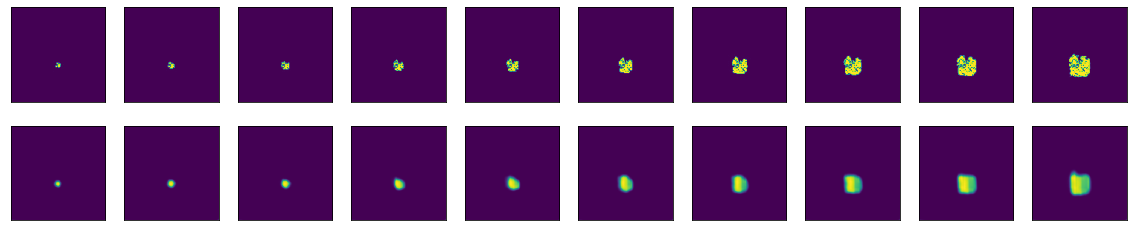

In [ ]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(128, 128))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

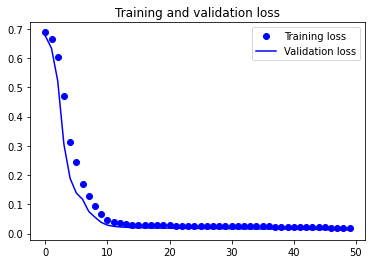

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

#Task 2): Time-Series Analysis Using Encoded Space

First check that Colab runs on GPU

In [ ]:
import tensorflow as tf
import keras
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/contents')

Drive already mounted at /contents; to attempt to forcibly remount, call drive.mount("/contents", force_remount=True).


First, I will save the convolutional autoencoder network that I have trained previously

In [ ]:
autoencoder.save('/contents/MyDrive/Colab Notebooks/ConvAuto')

In [ ]:
autoencoder.save_weights('/contents/MyDrive/Colab Notebooks/ConvAuto/autoencoder_weights.h5')

In [ ]:
conv_autoencoder = tf.keras.models.load_model('/contents/MyDrive/Colab Notebooks/ConvAuto')

Check that the loaded_model indeed inherits the trained weights

In [ ]:
x_train = X_train_RGB[:,:,:,1]
x_test = X_test_RGB[:,:,:,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 128, 128, 1))
x_test = np.reshape(x_test, (len(x_test), 128, 128, 1))

4/4 [==============================] - 4s 8ms/step


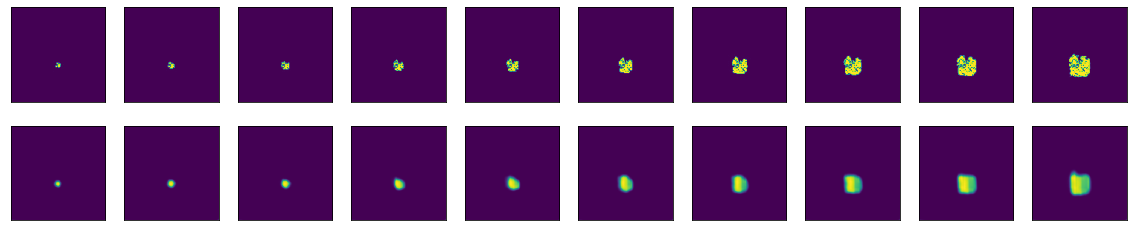

In [ ]:
import matplotlib.pyplot as plt
decoded_imgs = conv_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(128, 128))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Now, I will create a separate encoder network that uses my previously trained weights. This way I can obtain the dataset in the encoded space.

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(128, 128, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Creates a model that takes the input image and outputs the encoded representation; input_img has been defined previously
weights = conv_autoencoder.get_weights()
encoder = keras.Model(input_img, encoded)
encoder_weights = weights[:6] #this extracts weights only up to the encoded layer
encoder.set_weights(encoder_weights)
encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584 

In [ ]:
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

x_train_encoded.shape, x_test_encoded.shape

4/4 [==============================] - 0s 4ms/step


((656, 16, 16, 8), (128, 16, 16, 8))

Compared with the original dimension

In [ ]:
x_train.shape, x_test.shape

((656, 128, 128, 1), (128, 128, 128, 1))

Similarly I will redefine a decoder network that decode the compressed data into the full dimension space.

In [ ]:
# Creates a decoder model that takes the encoded inputs and outputs the decoded representation; input_img has been defined previously
weights = conv_autoencoder.get_weights()
decoder = keras.Model(encoded, decoded)
decoder_weights = weights[6:] #this extracts weights only up to the encoded layer
decoder.set_weights(decoder_weights)
decoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        1168

## Task
* Train a sequence-to-sequence predictive model (LSTM) in the reduced space, and decode the predicted results in the full-space.

For this task, I would use the CAE-transformed dataset. 

Since each video is 16 frames, I can reshape the dataset so that the tensor would be of the dimensions `(a,b,c,d,e)` where
* `a` corresponds to number of videos,
* `b` corresponds to number of frames in each video
* `c,d` corresponds to the dimension of the image of each frame
* `e` corresponds to the number of channels

In [ ]:
# define the cae transformed datasets (still in the full space)
x_train_cae = conv_autoencoder.predict(x_train)
x_test_cae = conv_autoencoder.predict(x_test)

4/4 [==============================] - 0s 7ms/step


In [ ]:
x_train_cae.shape, x_test_cae.shape

((656, 128, 128, 1), (128, 128, 128, 1))

In [ ]:
# feed in the un-compressed data
x_train_ts = np.reshape(x_train, (int(x_train.shape[0]/16), 16, 128, 128,1))
x_test_ts = np.reshape(x_test, (int(x_test.shape[0]/16), 16, 128, 128,1))

# feed in the compressed and decoded data
x_train_ts_cae = np.reshape(x_train_cae, (int(x_train_cae.shape[0]/16), 16, 128, 128, 1))
x_test_ts_cae = np.reshape(x_test_cae, (int(x_test_cae.shape[0]/16), 16, 128, 128, 1))


# feed in the compressed data in encoded dimensions
x_train_ts_encoded = np.reshape(x_train_encoded, (int(x_train_encoded.shape[0]/16), 16, 16, 16,8))
x_test_ts_encoded = np.reshape(x_test_encoded, (int(x_test_encoded.shape[0]/16), 16, 16, 16,8))

Now showing just one frame

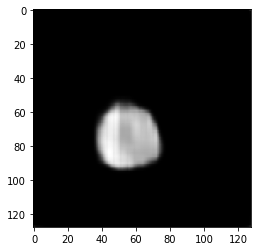

In [ ]:
v = 20
f = 13
plt.imshow(np.squeeze(x_train_ts_cae[v][f]),cmap='gray')

Comparing to the original image

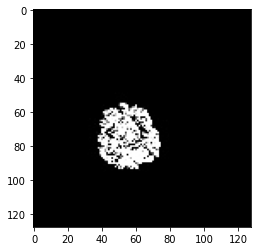

In [ ]:
plt.imshow(np.squeeze(x_train_ts[v][f]),cmap= 'gray')

Now, comparing a single video frame-by-frame between the compressed version and the original version

Displaying frames for example 20.


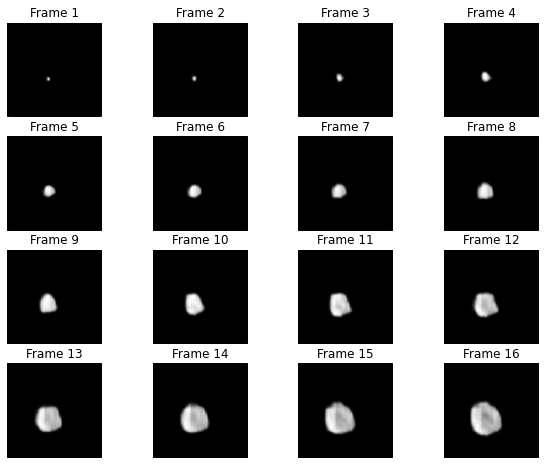

In [ ]:
fig,axes = plt.subplots(4,4,figsize = (10,8))

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(x_train_ts_cae[v][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {v}.")
plt.show()

Displaying frames for example 20.


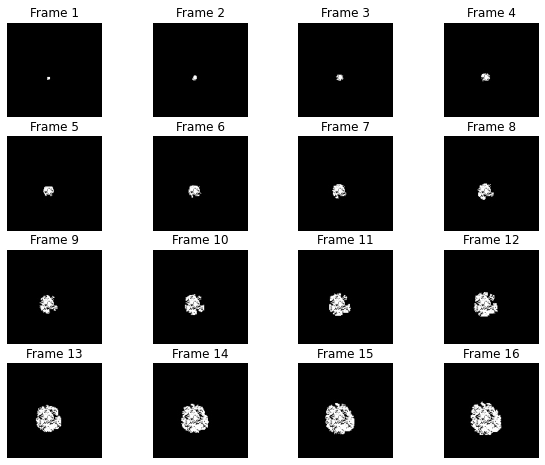

In [ ]:
fig,axes = plt.subplots(4,4,figsize = (10,8))

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(x_train_ts[v][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {v}.")
plt.show()

Displaying frames for example 19.


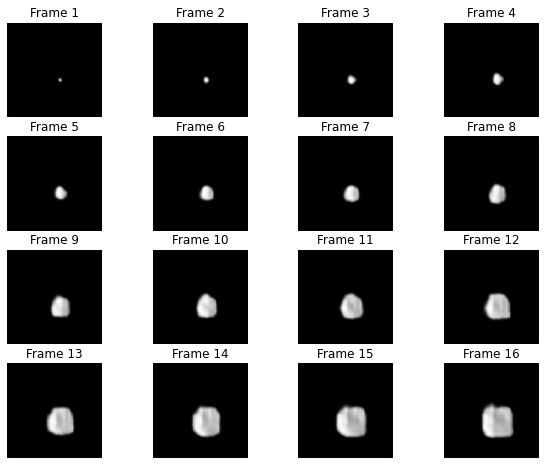

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 4, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(x_train_ts_cae)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(x_train_ts_cae[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

First, I will predict using a 1 time-step to 1 time-step model.

In [ ]:
# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
trainX, trainY = create_shifted_frames(x_train_ts_encoded)
x_val, y_val = create_shifted_frames(x_test_ts_encoded)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(trainX.shape) + ", " + str(trainY.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (41, 15, 16, 16, 8), (41, 15, 16, 16, 8)
Validation Dataset Shapes: (8, 15, 16, 16, 8), (8, 15, 16, 16, 8)


In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *trainX.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=8, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 16, 16, 8)  0         
                             ]                                   
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 16, 16, 64)  461056    
                                                                 
 batch_normalization (BatchN  (None, None, 16, 16, 64)  256      
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 16, 16, 64)  295168    
                                                                 
 batch_normalization_1 (Batc  (None, None, 16, 16, 64)  256      
 hNormalization)                                                 
                                                           

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 4

# Fit the model to the training data.
next_sequence_lstm = model.fit(
    trainX,
    trainY,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20
11/11 [==============================] - 11s 341ms/step - loss: 0.3919 - val_loss: 0.6657 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 3s 250ms/step - loss: -2.3282 - val_loss: 0.6445 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - 3s 255ms/step - loss: -15.4198 - val_loss: 0.6370 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - 3s 256ms/step - loss: -77.9349 - val_loss: 0.6584 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - 3s 255ms/step - loss: -1512.8126 - val_loss: 1.9538 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - 3s 256ms/step - loss: 626.8710 - val_loss: 1.9939 - lr: 0.0010
Epoch 7/20
11/11 [==============================] - 3s 258ms/step - loss: 158.5095 - val_loss: 0.9393 - lr: 0.0010
Epoch 8/20
11/11 [==============================] - 3s 263ms/step - loss: 45.5866 - val_loss: 0.8219 - lr: 0.0010
Epoch 9/20
11/11 [==============================] - 3s 259ms/step - loss: 17.1610

Now, for the 4-timestep to 4-timestep prediction, I will first reshape the dataset so that each video contains 4 training example, each of the shape (4, 16, 16, 8). To make the prediction easier, I will flatten each training example so that it is easier to feed into the LSTM network.

In [ ]:
x_train_ts_encoded.shape

(41, 16, 16, 16, 8)

In [ ]:
x_train_encoded_flatten = x_train_ts_encoded.reshape((x_train_ts_encoded.shape[0], x_train_ts_encoded.shape[1], 2048))
x_test_encoded_flatten = x_test_ts_encoded.reshape((x_test_ts_encoded.shape[0], x_test_ts_encoded.shape[1], 2048))
original_trainshape = x_train_ts_encoded.shape
original_testshape = x_test_ts_encoded.shape
x_train_encoded_flatten.shape

(41, 16, 2048)

Again I will create the shifted frames so that frames 1,2,3,4 would be used to predict 5,6,7,8 and 2,3,4,5 would be used to predict 6,7,8,9 so on. Hence each training example would be of the shape (4,16,16,8), where 4 indicates the four frames in a sequential order, and (16,16,8) indicates the encoded dimensions of each frame. 

In [ ]:
def create_4ts_dataset(data):
    new_data = np.expand_dims(data, axis = 2)
    x = np.zeros((new_data.shape[0], new_data.shape[1]-4, 4, new_data.shape[3]))
    y = np.zeros((new_data.shape[0], new_data.shape[1]-4, 4, new_data.shape[3]))
    for i in range(data.shape[1]-4):
      for j in range(4):
        x[:,i,j,:] = np.reshape(new_data[:,i+j,:,:],  newshape= x[:,i,j,:].shape)
        y[:,i,j,:] = np.reshape(new_data[:,i+j+1,:,:], newshape = x[:,i,j,:].shape)
    return x,y

In [ ]:
trainX, trainY = create_4ts_dataset(x_train_encoded_flatten)
x_val, y_val = create_4ts_dataset(x_test_encoded_flatten)
trainX.shape,trainY.shape

((41, 12, 4, 2048), (41, 12, 4, 2048))

In [ ]:
from keras import Sequential
from keras.layers import TimeDistributed, LSTM, Dense

model = Sequential()
model.add(LSTM(2048, input_shape=(4, 2048), return_sequences=True))
model.add(TimeDistributed(Dense(2048)))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 2048)           33562624  
                                                                 
 time_distributed_1 (TimeDis  (None, 4, 2048)          4196352   
 tributed)                                                       
                                                                 
Total params: 37,758,976
Trainable params: 37,758,976
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 12 # since there are 12 4-frames examples per video for training

# Fit the model to the training data.
for i in range(trainX.shape[0]):
  val_id = np.random.choice(len(x_val), 1)[0]
  model.fit(trainX[i], trainY[i], epochs = epochs, batch_size = batch_size, validation_data = (x_val[val_id], y_val[val_id]))

To visualize the output from the model's predictions

1/1 [==============================] - 0s 13ms/step


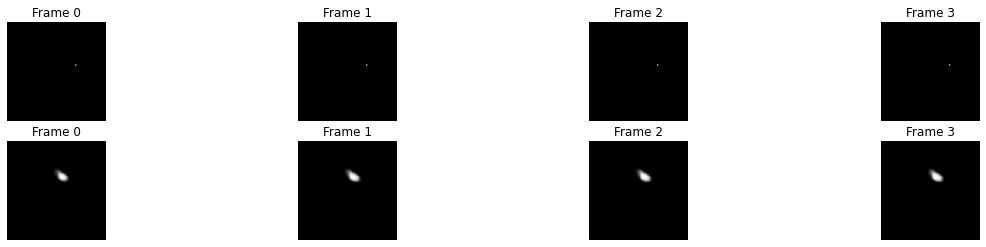

In [ ]:
v_id = np.random.choice(range(len(x_test_encoded_flatten)), size = 1)[0]
f_id = np.random.choice(10, size = 1)[0]

starting_frames = x_test_encoded_flatten[v_id][f_id:f_id+4]
original_frames = x_test_ts[v_id][f_id:f_id+4]
new_prediction = model.predict(np.expand_dims(starting_frames, axis = 0))

# now we use the decoder network to decode the predictions
new_prediction = new_prediction.reshape((4,2048))
decoded_predictions = []
for i in new_prediction:
  decoded_pred = decoder.predict(i.reshape((1,16,16,8)))
  decoded_predictions.append(decoded_pred)
decoded_predictions = np.array(decoded_predictions).reshape(4,128,128,1)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 4, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx}")
    ax.axis("off")

# Plot the new frames.
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(decoded_predictions[idx]), cmap="gray")
    ax.set_title(f"Frame {idx}")
    ax.axis("off")

# Display the figure.
plt.show()

#Other Attempts

1/1 [==============================] - 0s 138ms/step


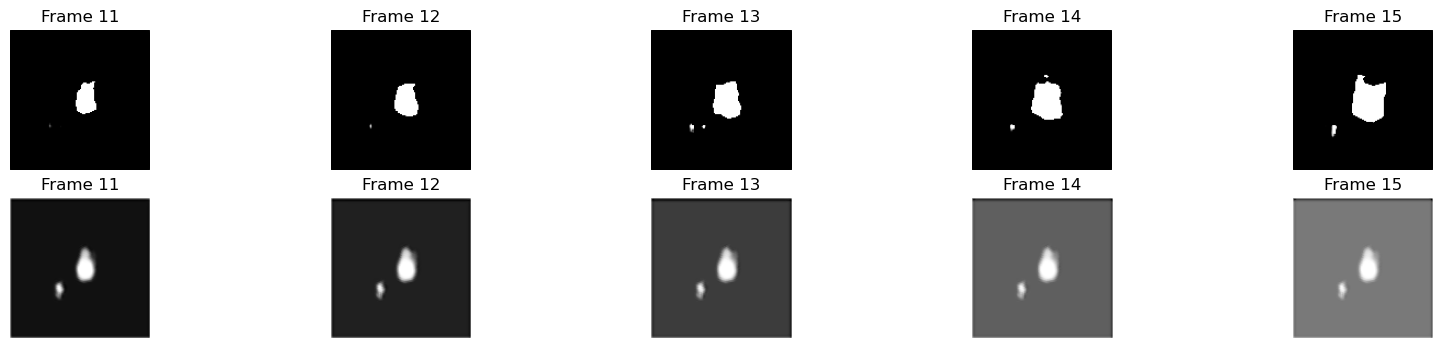

In [ ]:
# Select a random example from the validation dataset.
example = x_test_ts_byvideo[np.random.choice(range(len(x_test_ts_byvideo)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:5, ...]
original_frames = example[5:, ...]

# Predict a new set of 10 frames.
for _ in range(5):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[5:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

Now predicting four timesteps using four timesteps, I will slightly modify the function `create_shifted_frames`

For validation. here I will use the walk forward validation method. To be specific, I will use the data for every four frames to predict the next four frames

An LSTM model expects data to have the shape (samples, timesteps, features). For this particular task, one sample would be comprised of 4 time steps with 16384 features (128 * 128) for the four frames. Since the each video has 16 frames, and the shape of the input data would be (4, 4, 16384)

First, I will flatten the data

41 corresponds to the number of videos, 4 x 4 corresponds to the 4 x 4 frames in 1 video, and 16384 corresponds to the number of features (ie 128 x 128 flattened).


I will first experiment with one single video

In [ ]:
def create_shifted_frames(data):
    data_concatenated = np.zeros((data.shape[0], data.shape[1]-3, data.shape[2]*4, data.shape[3], data.shape[4]))
    for i in range(data.shape[0]):
      for j in range(data.shape[1]-3):
        data_concatenated[i,j,:,:,:] = np.concatenate((data[i,j,:,:,:],data[i,j+1,:,:,:],data[i,j+2,:,:,:],data[i,j+3,:,:,:]), axis = 0)
    x = data_concatenated[:,0:data_concatenated.shape[1]-1,:,:]
    y = data_concatenated[:,1:data_concatenated.shape[1],:,:]

    return x,y

# I will then apply the processing function to the datasets
x_train, y_train = create_shifted_frames(x_train_ts_byvideo)
x_val, y_val = create_shifted_frames(x_test_ts_byvideo)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Test Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (41, 12, 512, 128, 1), (41, 12, 512, 128, 1)
Test Dataset Shapes: (8, 12, 512, 128, 1), (8, 12, 512, 128, 1)


In [ ]:
def create_shifted_frames_sq_matrix(data):
    data_concatenated = np.zeros((data.shape[0], data.shape[1]-3, data.shape[2]*2, data.shape[3]*2, data.shape[4]))
    for i in range(data.shape[0]):
        for j in range(data.shape[1] - 3):
            if j % 4 == 1:
                data_concatenated[i,j,:data.shape[2],:data.shape[3],:] = data[i,j,:,:,:]
            elif j % 4 == 2:
                data_concatenated[i,j,data.shape[2]:,:data.shape[3],:] = data[i,j,:,:,:]
            elif j % 4 == 3:
                data_concatenated[i,j,:data.shape[2],data.shape[3]:,:] = data[i,j,:,:,:]
            else:
                data_concatenated[i,j,data.shape[2]:, data.shape[3]:,:] = data[i,j,:,:,:,]
    x = data_concatenated[:,:data_concatenated.shape[1]-1,:,:]
    y = data_concatenated[:,1:,:,:]

    return x,y

x_train, y_train = create_shifted_frames_sq_matrix(x_train_ts_byvideo)
x_val, y_val = create_shifted_frames_sq_matrix(x_test_ts_byvideo)

In [ ]:
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=4,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=4,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=4,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, 256, 256,   0         
                             1)]                                 
                                                                 
 conv_lstm2d_22 (ConvLSTM2D)  (None, None, 256, 256, 4  2016     
                             )                                   
                                                                 
 batch_normalization_14 (Bat  (None, None, 256, 256, 4  16       
 chNormalization)            )                                   
                                                                 
 conv_lstm2d_23 (ConvLSTM2D)  (None, None, 256, 256, 4  1168     
                             )                                   
                                                                 
 batch_normalization_15 (Bat  (None, None, 256, 256, 4  16 

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 15
batch_size = 4

# Fit the model to the training data.
four_ts_lstm = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/15
11/11 [==============================] - 100s 8s/step - loss: 0.6685 - val_loss: 0.6776 - lr: 0.0010
Epoch 2/15
11/11 [==============================] - 95s 9s/step - loss: 0.5037 - val_loss: 0.6702 - lr: 0.0010
Epoch 3/15
11/11 [==============================] - 92s 8s/step - loss: 0.3350 - val_loss: 0.6613 - lr: 0.0010
Epoch 4/15
11/11 [==============================] - 94s 9s/step - loss: 0.2265 - val_loss: 0.6455 - lr: 0.0010
Epoch 5/15
11/11 [==============================] - 93s 8s/step - loss: 0.1506 - val_loss: 0.6315 - lr: 0.0010
Epoch 6/15
11/11 [==============================] - 94s 8s/step - loss: 0.0981 - val_loss: 0.6215 - lr: 0.0010
Epoch 7/15
11/11 [==============================] - 95s 9s/step - loss: 0.0644 - val_loss: 0.6149 - lr: 0.0010
Epoch 8/15


KeyboardInterrupt: 

1/1 [==============================] - 0s 68ms/step


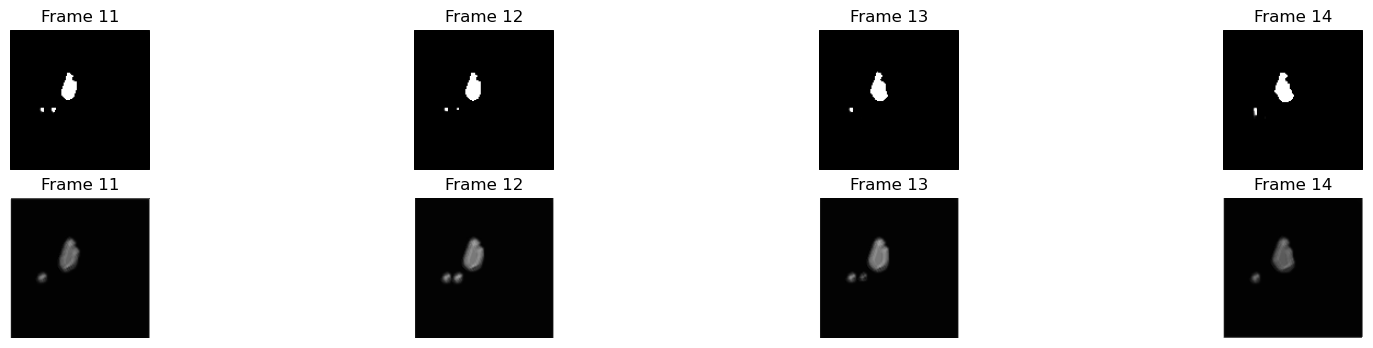

In [ ]:
# Select a random example from the validation dataset.
example = x_test_ts_byvideo[np.random.choice(range(len(x_test_ts_byvideo)), size=1)[0]]

first_4_frames = example[2:6,...].reshape((1,1,512,128,1))
predict_next4 = model.predict(first_4_frames)
actual_next4 = example[3:7,...].reshape((1,1,512,128,1))

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 4, figsize=(20, 4))

for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(actual_next4[:,:,idx*128:(idx+1)*128,...]), cmap="gray")
    ax.set_title(f"Frame {idx + }")
    ax.axis("off")

for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(predict_next4[:,:,idx*128:(idx+1)*128,...]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")


In [ ]:
# Select a random example from the validation dataset.
example = x_test_ts_byvideo[np.random.choice(range(len(x_test_ts_byvideo)), size=1)[0]]

# Pick the first/last four frames from the example.
frames = example[:4, ...]
original_frames = example[4:, ...]

# Predict a new set of 10 frames.
for _ in range(5):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[5:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

InvalidArgumentError: Graph execution error:

Detected at node 'model_7/conv_lstm2d_19/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/yb/bffvyrdd7gn289hkvgkcldn40000gn/T/ipykernel_2903/513918599.py", line 11, in <cell line: 9>
      new_prediction = model.predict(np.expand_dims(frames, axis=0))
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/layers/rnn/base_rnn.py", line 515, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/layers/rnn/base_conv_lstm.py", line 476, in call
      return super(ConvLSTM, self).call(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/layers/rnn/base_conv_rnn.py", line 292, in call
      last_output, outputs, states = backend.rnn(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/backend.py", line 4612, in rnn
      input_ta = tuple(
    File "/Users/ruigekong/.conda/envs/ComputationalBioPracticals/lib/python3.10/site-packages/keras/backend.py", line 4613, in <genexpr>
      ta.unstack(input_) if not go_backwards else ta
Node: 'model_7/conv_lstm2d_19/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [?,512,128,1] from a tensor with shape [1,128,128,1]
	 [[{{node model_7/conv_lstm2d_19/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_predict_function_71398]

We will then iterate over the time-steps to divide the data into overlapping windows; each iteration moves along one time step and predicts the subsequent four frames. We can also do this in a way where the number of inputs and outputs are parameterized (e.g. n_input, n_out) so that I can experiment with different values or adapt it for your own problem.

Below is a function named to_supervised() that takes four frames (history) and the number of time steps to use as inputs and outputs and returns the data in the overlapping moving window format.

In [ ]:
# as we cannot concatenate all the videos to make one training set, for each time we can only feed one video into the model

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=4):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)


When the function is run on one video, the 4 samples of 4 frames is transformed into 12 samples. Hence the transformed dataset for one video is of the shape `X = (12, 4, 16384)` and `y = (12,4)`

I will develop a model with single hidden LSTm layer with 200 units, followed by a fully connected layer with 100 nodes that interpret the features learned by LSTM layer. THe output predict a matrix of dimension (4, 128, 128), one for each frame in the output sequence

I will use Adam implementation of stochastic gradient descent and fit modelw ith 20 epcohs, batch size 1

In [ ]:
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 2
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

The model expects data to have the same three dimensional shape when making a prediction. The expected shape of an input pattern is one sample, 4 frames of 16384 features, hence the shape (1, 4, 16384)

I will reshape the input into expected

In [ ]:

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [ ]:
# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [ ]:
n_input = 4
score, scores = evaluate_model(single_train, single_test, n_input)
summarize_scores('lstm', score, scores)

lstm: [0.000] 0.0, 0.0, 0.0, 0.0


I will now define a helper function that shifts the frames, were `x` is frames 0 to n-1, and `y` is the frames 1 to n. I will create an array `data_concatenated` where I will merge four frames for a single training example (e.g. frames 1,2,3,4 merged as training example) and the next four frames merged to be used for labels.

In [ ]:
def create_shifted_frames(data):
    data_concatenated = np.zeros((data.shape[0], data.shape[1]-3, data.shape[2]*4, data.shape[3], data.shape[4]))
    for i in range(data.shape[0]):
      for j in range(data.shape[1]-3):
        data_concatenated[i,j,:,:,:] = np.concatenate((data[i,j,:,:,:],data[i,j+1,:,:,:],data[i,j+2,:,:,:],data[i,j+3,:,:,:]), axis = 0)
    x = data_concatenated[:,0:data_concatenated.shape[1]-1,:,:]
    y = data_concatenated[:,1:data_concatenated.shape[1],:,:]
    return x,y

# I will then apply the processing function to the datasets
x_train, y_train = create_shifted_frames(x_train_ts_byvideo)
x_val, y_val = create_shifted_frames(x_test_ts_byvideo)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Test Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))


Training Dataset Shapes: (41, 12, 512, 128, 1), (41, 12, 512, 128, 1)
Test Dataset Shapes: (8, 12, 512, 128, 1), (8, 12, 512, 128, 1)


Displaying frames for example 29.


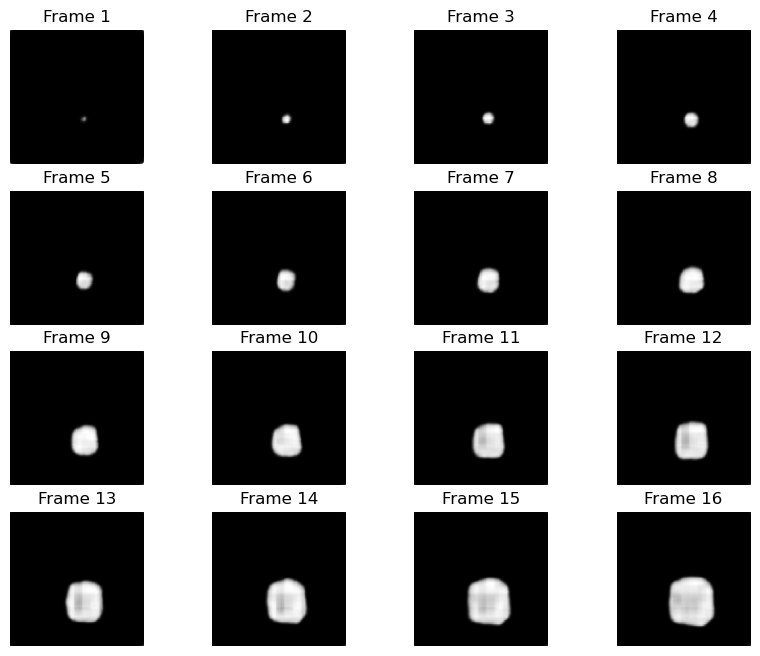

In [ ]:
fig, axes = plt.subplots(4,4,figsize = (10,8))

data_choice = np.random.choice(range(len(x_train_ts_byvideo)),size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(x_train_ts_byvideo[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

Now, to build a convolutional LSTM model, I will use the ConvLSTM2D layer, which will accept the input of shape(batch_size, num_frames, width, height, channels) and return a prediction with the same shape

In [ ]:

myDO = 0.3

# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# I will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=16,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
    dropout=myDO,
    recurrent_dropout=myDO
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=16,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
    dropout=myDO,
    recurrent_dropout=myDO
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=16,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
    dropout=myDO,
    recurrent_dropout=myDO
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, I will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

Now, training the model

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 10
batch_size = 5

# Fit the model to the training data.
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

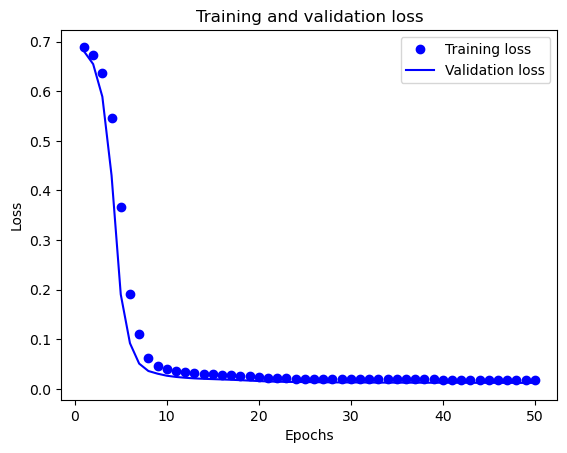

In [ ]:
# Plot learning curves
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()